In [23]:
  
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8bc849da-7d07-43be-9d3f-a730165cd051',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-03-18T18:08:12.057Z', 'error_code': 0, 'error_message': None, 'elapsed': 7, 'credit_count': 1, 'notice': None, 'total_count': 9121}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10930, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [24]:
#Normalize the data and insert the into a dataframe
import pandas as pd
df=pd.json_normalize(data["data"])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10930,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.965778e+07,1.965778e+07,...,1.322332e+12,52.2025,1.412619e+12,None,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,8594,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200789e+08,1.200789e+08,...,4.208620e+11,16.6135,4.208620e+11,None,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,79011,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.034152e+11,1.067928e+11,...,1.034164e+11,4.0916,1.067941e+11,None,2024-03-18T17:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,5426,Solana,SOL,solana,639,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.438885e+08,5.721467e+08,...,8.778786e+10,3.4638,1.131535e+11,None,2024-03-18T18:01:00.000Z,NaN,NaN,NaN,NaN,NaN
4,1839,BNB,BNB,bnb,2110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495383e+08,1.495383e+08,...,8.211662e+10,3.2424,8.211662e+10,None,2024-03-18T18:00:00.000Z,NaN,NaN,NaN,NaN,NaN
5,52,XRP,XRP,xrp,1260,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.480019e+10,9.998780e+10,...,3.298905e+10,1.3022,6.019880e+10,None,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,17475,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.092377e+10,3.092377e+10,...,3.093150e+10,1.2203,3.093150e+10,None,2024-03-18T18:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,5805,Avalanche,AVAX,avalanche,688,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,3.773112e+08,4.360008e+08,...,2.375505e+10,0.9380,4.533031e+10,None,2024-03-18T18:00:00.000Z,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,cardano,1112,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.556294e+10,3.671464e+10,...,2.318396e+10,0.9146,2.933611e+10,None,2024-03-18T18:01:00.000Z,NaN,NaN,NaN,NaN,NaN
9,74,Dogecoin,DOGE,dogecoin,931,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.435201e+11,1.435201e+11,...,2.038933e+10,0.8049,2.038933e+10,None,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN


In [25]:
#Create a timestamp column to monitor requests
df["timestamp"]= pd.to_datetime("now")
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10930,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.965778e+07,1.965778e+07,...,52.2025,1.412619e+12,None,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:12.534367
1,1027,Ethereum,ETH,ethereum,8594,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200789e+08,1.200789e+08,...,16.6135,4.208620e+11,None,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:12.534367
2,825,Tether USDt,USDT,tether,79011,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.034152e+11,1.067928e+11,...,4.0916,1.067941e+11,None,2024-03-18T17:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-18 20:08:12.534367
3,5426,Solana,SOL,solana,639,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.438885e+08,5.721467e+08,...,3.4638,1.131535e+11,None,2024-03-18T18:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:12.534367
4,1839,BNB,BNB,bnb,2110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495383e+08,1.495383e+08,...,3.2424,8.211662e+10,None,2024-03-18T18:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:12.534367
5,52,XRP,XRP,xrp,1260,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.480019e+10,9.998780e+10,...,1.3022,6.019880e+10,None,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:12.534367
6,3408,USDC,USDC,usd-coin,17475,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.092377e+10,3.092377e+10,...,1.2203,3.093150e+10,None,2024-03-18T18:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-18 20:08:12.534367
7,5805,Avalanche,AVAX,avalanche,688,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,3.773112e+08,4.360008e+08,...,0.9380,4.533031e+10,None,2024-03-18T18:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:12.534367
8,2010,Cardano,ADA,cardano,1112,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.556294e+10,3.671464e+10,...,0.9146,2.933611e+10,None,2024-03-18T18:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:12.534367
9,74,Dogecoin,DOGE,dogecoin,931,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.435201e+11,1.435201e+11,...,0.8049,2.038933e+10,None,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:12.534367


In [26]:
df = pd.DataFrame()
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '8bc849da-7d07-43be-9d3f-a730165cd051',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      df = pd.json_normalize(data['data'])
      df['timestamp'] = pd.to_datetime('now')
        
        # Concatenate df2 with df
      df 
        

          
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        

      
    if not os.path.isfile(r"C:\Users\shred\Desktop\Portofolio\8\API.csv"):
        df.to_csv(r"C:\Users\shred\Desktop\Portofolio\8\API.csv", header ="column_names" )
    else:
        df.to_csv(r"C:\Users\shred\Desktop\Portofolio\8\API.csv",mode= "a", header = False)

In [27]:
import os
from time import time
from time import sleep

for i in range(300):
    api_runner()
    print("Api Runner completed")
    sleep(60) #sleep for 1 minute
exit()


Api Runner completed
Api Runner completed
Api Runner completed
Api Runner completed
Api Runner completed
Api Runner completed


KeyboardInterrupt: 

In [28]:
df_test = pd.read_csv(r"C:\Users\shred\Desktop\Portofolio\8\API.csv")
df_test

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10930,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.965778e+07,...,52.2025,1.412619e+12,NaN,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:13.420207
1,1,1027,Ethereum,ETH,ethereum,8594,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.200789e+08,...,16.6135,4.208620e+11,NaN,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:13.420207
2,2,825,Tether USDt,USDT,tether,79011,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.034152e+11,...,4.0916,1.067941e+11,NaN,2024-03-18T17:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-18 20:08:13.420207
3,3,5426,Solana,SOL,solana,639,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.438885e+08,...,3.4638,1.131535e+11,NaN,2024-03-18T18:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:13.420207
4,4,1839,BNB,BNB,bnb,2110,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495383e+08,...,3.2424,8.211662e+10,NaN,2024-03-18T18:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:13.420207
5,5,52,XRP,XRP,xrp,1260,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.480019e+10,...,1.3022,6.019880e+10,NaN,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:13.420207
6,6,3408,USDC,USDC,usd-coin,17475,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.092377e+10,...,1.2203,3.093150e+10,NaN,2024-03-18T18:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-18 20:08:13.420207
7,7,5805,Avalanche,AVAX,avalanche,688,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.200000e+08,3.773112e+08,...,0.9380,4.533031e+10,NaN,2024-03-18T18:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:13.420207
8,8,2010,Cardano,ADA,cardano,1112,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.556294e+10,...,0.9146,2.933611e+10,NaN,2024-03-18T18:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:13.420207
9,9,74,Dogecoin,DOGE,dogecoin,931,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.435201e+11,...,0.8049,2.038933e+10,NaN,2024-03-18T18:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-18 20:08:13.420207


In [29]:
#change number notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [31]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.67367,-1.47263,-7.23800,31.45605,61.71444,60.52552
Ethereum,0.60574,-3.37205,-13.26682,26.71923,41.84065,63.52746
Tether USDt,0.01527,0.08348,-0.09742,-0.02534,0.12409,0.00445
Solana,-0.73575,0.92583,34.33162,83.59343,107.44468,174.54655
BNB,0.62199,-6.14291,5.93842,55.05973,77.12581,117.84722
XRP,0.16535,-3.19290,-18.04914,9.60362,8.87923,0.56648
USDC,-0.00454,0.02039,0.03864,0.02280,0.02405,0.01156
Avalanche,-0.34582,12.50410,33.90754,59.39073,85.37793,61.24847
Cardano,-0.14414,-4.56971,-14.86200,11.87725,28.18172,14.52368


In [32]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.67367
             quote.USD.percent_change_24h    -1.47263
             quote.USD.percent_change_7d     -7.23800
             quote.USD.percent_change_30d    31.45605
             quote.USD.percent_change_60d    61.71444
             quote.USD.percent_change_90d    60.52552
Ethereum     quote.USD.percent_change_1h      0.60574
             quote.USD.percent_change_24h    -3.37205
             quote.USD.percent_change_7d    -13.26682
             quote.USD.percent_change_30d    26.71923
             quote.USD.percent_change_60d    41.84065
             quote.USD.percent_change_90d    63.52746
Tether USDt  quote.USD.percent_change_1h      0.01527
             quote.USD.percent_change_24h     0.08348
             quote.USD.percent_change_7d     -0.09742
             quote.USD.percent_change_30d    -0.02534
             quote.USD.percent_change_60d     0.12409
             quote.USD.percent_change_90

In [33]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.67367
            quote.USD.percent_change_24h  -1.47263
            quote.USD.percent_change_7d   -7.23800
            quote.USD.percent_change_30d  31.45605
            quote.USD.percent_change_60d  61.71444
            quote.USD.percent_change_90d  60.52552
Ethereum    quote.USD.percent_change_1h    0.60574
            quote.USD.percent_change_24h  -3.37205
            quote.USD.percent_change_7d  -13.26682
            quote.USD.percent_change_30d  26.71923
            quote.USD.percent_change_60d  41.84065
            quote.USD.percent_change_90d  63.52746
Tether USDt quote.USD.percent_change_1h    0.01527
            quote.USD.percent_change_24h   0.08348
            quote.USD.percent_change_7d   -0.09742
            quote.USD.percent_change_30d  -0.02534
            quote.USD.percent_change_60d   0.12409
            quote.USD.percent_change_90d   0.00445
Solana      quote.USD.percent_change_1h   -0.73575
            quote.USD.percent_change_24h   0.92583
            quote.USD.percent_change_7d   34.33162
            quote.USD.percent_change_30d  83.59343
            quote.USD.percent_change_60d 107.44468
            quote.USD.percent_change_90d 174.54655
BNB         quote.USD.percent_change_1h    0.62199
            quote.USD.percent_change_24h  -6.14291
            quote.USD.percent_change_7d    5.93842
            quote.USD.percent_change_30d  55.05973
            quote.USD.percent_change_60d  77.12581
            quote.USD.percent_change_90d 117.84722
XRP         quote.USD.percent_change_1h    0.16535
            quote.USD.percent_change_24h  -3.19290
            quote.USD.percent_change_7d  -18.04914
            quote.USD.percent_change_30d   9.60362
            quote.USD.percent_change_60d   8.87923
            quote.USD.percent_change_90d   0.56648
USDC        quote.USD.percent_change_1h   -0.00454
            quote.USD.percent_change_24h   0.02039
            quote.USD.percent_change_7d    0.03864
            quote.USD.percent_change_30d   0.02280
            quote.USD.percent_change_60d   0.02405
            quote.USD.percent_change_90d   0.01156
Avalanche   quote.USD.percent_change_1h   -0.34582
            quote.USD.percent_change_24h  12.50410
            quote.USD.percent_change_7d   33.90754
            quote.USD.percent_change_30d  59.39073
            quote.USD.percent_change_60d  85.37793
            quote.USD.percent_change_90d  61.24847
Cardano     quote.USD.percent_change_1h   -0.14414
            quote.USD.percent_change_24h  -4.56971
            quote.USD.percent_change_7d  -14.86200
            quote.USD.percent_change_30d  11.87725
            quote.USD.percent_change_60d  28.18172
            quote.USD.percent_change_90d  14.52368
Dogecoin    quote.USD.percent_change_1h    0.56374
            quote.USD.percent_change_24h  -8.59828
            quote.USD.percent_change_7d  -18.40434
            quote.USD.percent_change_30d  70.73016
            quote.USD.percent_change_60d  81.26981
            quote.USD.percent_change_90d  58.34249

In [38]:
df5.count()

values    60
dtype: int64

In [40]:
index = pd.Index(range(60))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.67367
1,Bitcoin,quote.USD.percent_change_24h,-1.47263
2,Bitcoin,quote.USD.percent_change_7d,-7.23800
3,Bitcoin,quote.USD.percent_change_30d,31.45605
4,Bitcoin,quote.USD.percent_change_60d,61.71444
5,Bitcoin,quote.USD.percent_change_90d,60.52552
6,Ethereum,quote.USD.percent_change_1h,0.60574
7,Ethereum,quote.USD.percent_change_24h,-3.37205
8,Ethereum,quote.USD.percent_change_7d,-13.26682
9,Ethereum,quote.USD.percent_change_30d,26.71923


In [42]:
df7 = df6.rename(columns = {"level_1" : "percent_change"})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.67367
1,Bitcoin,quote.USD.percent_change_24h,-1.47263
2,Bitcoin,quote.USD.percent_change_7d,-7.23800
3,Bitcoin,quote.USD.percent_change_30d,31.45605
4,Bitcoin,quote.USD.percent_change_60d,61.71444
5,Bitcoin,quote.USD.percent_change_90d,60.52552
6,Ethereum,quote.USD.percent_change_1h,0.60574
7,Ethereum,quote.USD.percent_change_24h,-3.37205
8,Ethereum,quote.USD.percent_change_7d,-13.26682
9,Ethereum,quote.USD.percent_change_30d,26.71923


In [47]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h',	'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.67367
1,Bitcoin,24h,-1.47263
2,Bitcoin,7d,-7.23800
3,Bitcoin,30d,31.45605
4,Bitcoin,60d,61.71444
5,Bitcoin,90d,60.52552
6,Ethereum,1h,0.60574
7,Ethereum,24h,-3.37205
8,Ethereum,7d,-13.26682
9,Ethereum,30d,26.71923


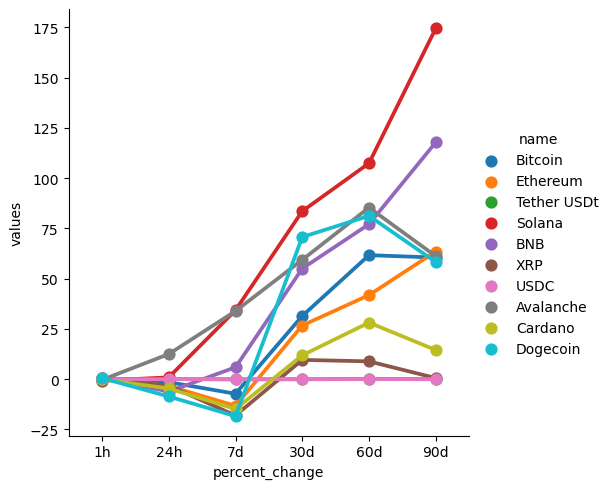

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')